#  📊 Preparing Data for Visualization in Power BI

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the book prices dataset

In [132]:
# books_prices_df = pd.read_csv(r"datasets\2025.04.07\book_prices_data_2025.04.07.09-42.csv")

### 2. Load the books metadata dataset (title, author, etc.)

In [133]:
# books_df = pd.read_csv(r"datasets\2025.04.07\books_data_2025.04.07.09-42.csv")

### 3. Merge the two datasets on the 'id' column


In [134]:
# merged_df = pd.merge(books_df, books_prices_df, on='id', how='left')

### 4. Drop the redundant 'book_id' column

In [135]:
# merged_df = merged_df.drop(columns=['book_id'])

In [136]:
merged_df= pd.read_csv('merged_data.csv') 

### 5. Check for missing values in each column

In [137]:
merged_df.isnull().sum()

id                0
title             0
author          460
category          0
price             0
retrieved_at      0
dtype: int64

### 6. Calculate the percentage of missing values per column  
- Around 2.28% of authors are missing


In [138]:
missing_percentage = (merged_df.isnull().sum() / len(merged_df) * 100).round(2)
print(missing_percentage)

id              0.00
title           0.00
author          2.28
category        0.00
price           0.00
retrieved_at    0.00
dtype: float64


### 7. Visualize Missing Authors by Category

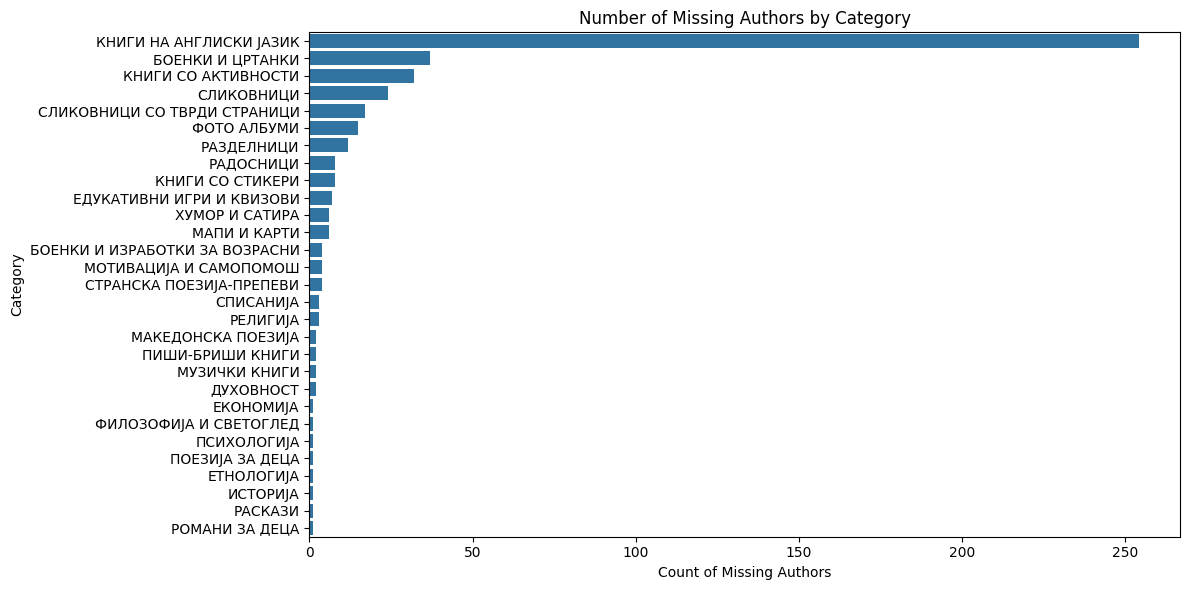

In [139]:
# Filter only the rows where the 'author' column is missing

missing_author = merged_df[merged_df["author"].isnull()]

# Count how many missing authors exist per book category

missing_by_category = missing_author['category'].value_counts().reset_index()
missing_by_category.columns = ['Category', 'MissingAuthorCount']

# Plot a horizontal bar chart to visualize which categories have the most missing authors

plt.figure(figsize=(12, 6))
sns.barplot(data=missing_by_category, x='MissingAuthorCount', y='Category')
plt.title("Number of Missing Authors by Category")
plt.xlabel("Count of Missing Authors")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

- 🧠 **Observations:** 

- The visualization provides insight into whether missing authors are concentrated within specific book categories (e.g.,coloring books, photography books etc.).

- This context helps us assess the impact of the missing data. If the majority of missing values occur in categories where the author's identity is less important (e.g., sticker books or planners), the missingness may not significantly affect downstream analyses.

- Given that the percentage of missing authors is relatively low (2.28%) and the affected categories are not critically dependent on author information, we can reasonably assume that the data is **Missing Completely At Random (MCAR)**. Therefore, imputing missing author values with a placeholder such as "Unknown" is an appropriate and non-biased solution.


### 8.  Replace missing authors with a placeholder value

Check the percentage of authors that are "/" and those that are not "/":

In [140]:
total_rows = len(merged_df)

unknown_count = (merged_df['author'] == '/').sum()

non_unknown_count = (merged_df['author'] != '/').sum()

unknown_percentage = (unknown_count / total_rows) * 100
non_unknown_percentage = (non_unknown_count / total_rows) * 100

print(f"Percentage of 'Unknown' authors: {unknown_percentage:.2f}%")
print(f"Percentage of non-'Unknown' authors: {non_unknown_percentage:.2f}%")

Percentage of 'Unknown' authors: 0.28%
Percentage of non-'Unknown' authors: 99.72%


In [141]:
merged_df['author'] = merged_df['author'].replace('/', 'Unknown').fillna('Unknown')

Check the percentage of authors that are "Unknown" and those that are not "Unknown":

In [142]:
total_rows = len(merged_df)

unknown_count = (merged_df['author'] == 'Unknown').sum()

non_unknown_count = (merged_df['author'] != 'Unknown').sum()

unknown_percentage = (unknown_count / total_rows) * 100
non_unknown_percentage = (non_unknown_count / total_rows) * 100

print(f"Percentage of 'Unknown' authors: {unknown_percentage:.2f}%")
print(f"Percentage of non-'Unknown' authors: {non_unknown_percentage:.2f}%")

Percentage of 'Unknown' authors: 2.58%
Percentage of non-'Unknown' authors: 97.42%


- Check if the imputation was successful

In [143]:
merged_df.isnull().sum()

id              0
title           0
author          0
category        0
price           0
retrieved_at    0
dtype: int64

### 9. Define a function to normalize author names  
- **Why Normalize Author Names?**  
    - Inconsistent Formats:
        - Some names are written in the `"LastName, FirstName"` format.
        - Others are written in `"FirstName LastName"` or even as a comma-separated list of multiple authors.

    - Normalizing names into a consistent format like `"FirstName LastName"` or `"Author1 Author2 Author3"` significantly improves the **quality** and **usability** of the data.

In [144]:
def normalize_author(author):
    if pd.isna(author):
        return author  
    if ',' in author:
        parts = [part.strip() for part in author.split(',')]
        return ' '.join(parts[::-1])
    return author 



### 10. Apply normalization to all author names

In [145]:
merged_df['author'] = merged_df['author'].apply(normalize_author)

### 11. Save Cleaned Data 
- The cleaned and normalized dataset is now ready for further analysis or visualization.
- It can be seamlessly imported into tools like **Power BI**, **Tableau**, or other data visualization platforms for generating insights and reports.

In [146]:
merged_df.to_csv("preprocessed_data.csv", index=False, encoding='utf-8-sig')

In [147]:
# Calculate total number of rows
total_rows = len(merged_df)

# Calculate number of 'Unknown' authors
unknown_count = (merged_df['author'] == 'Unknown').sum()

# Calculate number of non-'Unknown' authors
non_unknown_count = (merged_df['author'] != 'Unknown').sum()

# Calculate percentages
unknown_percentage = (unknown_count / total_rows) * 100
non_unknown_percentage = (non_unknown_count / total_rows) * 100

# Print results
print(f"Percentage of 'Unknown' authors: {unknown_percentage:.2f}%")
print(f"Percentage of non-'Unknown' authors: {non_unknown_percentage:.2f}%")


Percentage of 'Unknown' authors: 2.58%
Percentage of non-'Unknown' authors: 97.42%


In [148]:
merged_df.to_csv("preprocessed_data.csv", index=False, encoding='utf-8-sig')

In [149]:
print( (merged_df['author'] == '/').sum())


0
